<a href="https://colab.research.google.com/github/entc-17-fyp-20/WPF_Data_Visualization/blob/Kusal/LSTM_Multi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler , StandardScaler
import tensorflow as tf

mpl.rcParams['figure.figsize'] =[10,8]
mpl.rcParams['axes.grid']= False

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/entc-17-fyp-20/Datasets/main/August-2021%20Mannar%20Wind%20Data1.csv')
df = df.rename(columns = {'TimeStamp': 'Date & Time', 'Average  Wind Speed(m/s)': 'Wind Speed (m/s)', 'Average  Wind Dirction(deg)':'Wind Direction(deg)','Average Active Power(MW)':'Active Power(MW)'}, inplace = False)
df=df[['Date & Time','Active Power(MW)','Wind Speed (m/s)','Wind Direction(deg)']]
df

,Date & Time,Active Power(MW),Wind Speed (m/s),Wind Direction(deg)
0,8/1/2021 0:00,95.84,10.66,186.92
1,8/1/2021 0:10,96.03,10.71,188.15
2,8/1/2021 0:20,93.72,10.53,188.78
3,8/1/2021 0:30,88.84,10.20,189.80
4,8/1/2021 0:40,90.97,10.34,193.00
...,...,...,...,...
4404,8/31/2021 23:20,100.45,11.62,195.08
4405,8/31/2021 23:30,98.01,11.16,196.36
4406,8/31/2021 23:40,93.11,10.66,198.02
4407,8/31/2021 23:50,93.68,10.90,196.96


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4409 entries, 0 to 4408
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date & Time          4409 non-null   object 
 1   Active Power(MW)     4409 non-null   float64
 2   Wind Speed (m/s)     4409 non-null   float64
 3   Wind Direction(deg)  4409 non-null   float64
dtypes: float64(3), object(1)
memory usage: 137.9+ KB


In [ ]:
df['Date & Time'] = pd.to_datetime(df['Date & Time'], format="%m/%d/%Y %H:%M")

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f6a6806b610>,
      dtype=object)

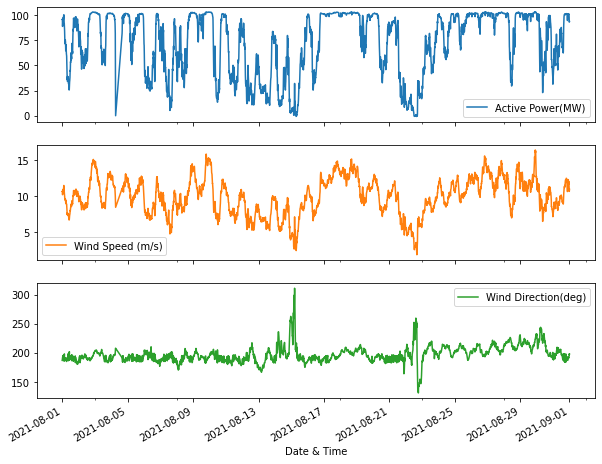

In [ ]:
df.set_index('Date & Time')[['Active Power(MW)','Wind Speed (m/s)','Wind Direction(deg)']].plot(subplots=True)

In [ ]:
df_input=df[['Active Power(MW)','Wind Speed (m/s)','Wind Direction(deg)']]
df_input

,Active Power(MW),Wind Speed (m/s),Wind Direction(deg)
0,95.84,10.66,186.92
1,96.03,10.71,188.15
2,93.72,10.53,188.78
3,88.84,10.20,189.80
4,90.97,10.34,193.00
...,...,...,...
4404,100.45,11.62,195.08
4405,98.01,11.16,196.36
4406,93.11,10.66,198.02
4407,93.68,10.90,196.96


In [ ]:
df_input.describe()

,Active Power(MW),Wind Speed (m/s),Wind Direction(deg)
count,4409.000000,4409.000000,4409.000000
mean,72.599642,9.954030,197.371971
std,31.062804,2.587067,14.207014
min,-0.760000,1.810000,130.840000
25%,48.450000,8.220000,189.000000
50%,84.460000,10.060000,194.740000
75%,100.990000,11.880000,203.610000
max,103.420000,16.450000,311.140000


In [ ]:
scaler=MinMaxScaler()
data_scaled=scaler.fit_transform(df_input)

In [ ]:
data_scaled

array([[0.92724131, 0.6045082 , 0.31103716],
       [0.92906508, 0.6079235 , 0.31785912],
       [0.90689192, 0.59562842, 0.3213533 ],
       ...,
       [0.90103667, 0.6045082 , 0.37260122],
       [0.90650797, 0.62090164, 0.36672213],
       [0.90737186, 0.62431694, 0.37071547]])

In [ ]:
features=data_scaled
target=data_scaled[:,0]
#target

In [ ]:
TimeseriesGenerator(features,target,length=5,sampling_rate=1,batch_size=1)[0]

(array([[[0.92724131, 0.6045082 , 0.31103716],
         [0.92906508, 0.6079235 , 0.31785912],
         [0.90689192, 0.59562842, 0.3213533 ],
         [0.86004991, 0.57308743, 0.32701054],
         [0.8804953 , 0.58265027, 0.34475874]]]), array([0.89969284]))

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(features,target,test_size=0.20,random_state=123,shuffle=False)

In [ ]:
x_train.shape

(3527, 3)

In [ ]:
x_test.shape

(882, 3)

In [ ]:
win_length=18
batch_size=32
num_feature=3
train_generator = TimeseriesGenerator(x_train,y_train,length=win_length,sampling_rate=1,batch_size=batch_size)
test_generator = TimeseriesGenerator(x_test,y_test,length=win_length,sampling_rate=1,batch_size=batch_size)

In [ ]:
train_generator[0]

(array([[[0.92724131, 0.6045082 , 0.31103716],
         [0.92906508, 0.6079235 , 0.31785912],
         [0.90689192, 0.59562842, 0.3213533 ],
         ...,
         [0.96928393, 0.65505464, 0.35357737],
         [0.93069687, 0.62978142, 0.36051026],
         [0.89489345, 0.60997268, 0.30332779]],
 
        [[0.92906508, 0.6079235 , 0.31785912],
         [0.90689192, 0.59562842, 0.3213533 ],
         [0.86004991, 0.57308743, 0.32701054],
         ...,
         [0.93069687, 0.62978142, 0.36051026],
         [0.89489345, 0.60997268, 0.30332779],
         [0.89162987, 0.60177596, 0.36589018]],
 
        [[0.90689192, 0.59562842, 0.3213533 ],
         [0.86004991, 0.57308743, 0.32701054],
         [0.8804953 , 0.58265027, 0.34475874],
         ...,
         [0.89489345, 0.60997268, 0.30332779],
         [0.89162987, 0.60177596, 0.36589018],
         [0.87176041, 0.59016393, 0.37287854]],
 
        ...,
 
        [[0.7117489 , 0.5273224 , 0.33133666],
         [0.64484546, 0.5034153 , 0.32745

In [ ]:
model=tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_feature),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.LSTM(64,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.LSTM(32,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.LSTM(32,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(1))

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_14 (LSTM)               (None, 18, 128)           67584     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 18, 128)           0         
_________________________________________________________________
lstm_15 (LSTM)               (None, 18, 64)            49408     
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 18, 64)            0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 18, 64)            0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 18, 32)            12416     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 18, 32)           

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",patience=2,mode="min")
model.compile(loss=tf.losses.MeanSquaredError(),optimizer=tf.optimizers.Adam(),metrics=[tf.metrics.MeanAbsoluteError()])
history=model.fit_generator(train_generator,epochs=50,validation_data=test_generator,shuffle=False,callbacks=[early_stopping])

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


110/110 [==============================] - 14s 69ms/step - loss: 0.0677 - mean_absolute_error: 0.2106 - val_loss: 0.0235 - val_mean_absolute_error: 0.1010
Epoch 2/50
110/110 [==============================] - 6s 54ms/step - loss: 0.0440 - mean_absolute_error: 0.1703 - val_loss: 0.0195 - val_mean_absolute_error: 0.1068
Epoch 3/50
110/110 [==============================] - 6s 54ms/step - loss: 0.0380 - mean_absolute_error: 0.1574 - val_loss: 0.0171 - val_mean_absolute_error: 0.0954
Epoch 4/50
110/110 [==============================] - 6s 54ms/step - loss: 0.0314 - mean_absolute_error: 0.1421 - val_loss: 0.0150 - val_mean_absolute_error: 0.0802
Epoch 5/50
110/110 [==============================] - 6s 56ms/step - loss: 0.0265 - mean_absolute_error: 0.1294 - val_loss: 0.0146 - val_mean_absolute_error: 0.0653
Epoch 6/50
110/110 [==============================] - 6s 55ms/step - loss: 0.0231 - mean_absolute_error: 0.1196 - val_loss: 0.0137 - val_mean_absolute_error: 0.0667
Epoch 7/50
110/110 [

In [ ]:
model.evaluate_generator(test_generator,verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2006: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.00637288112193346, 0.05841479450464249]

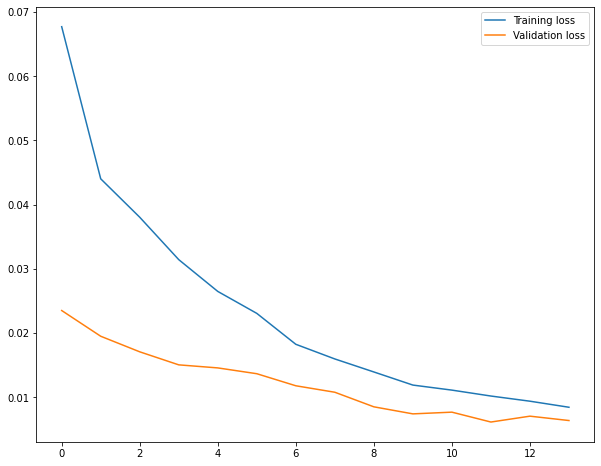

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
predictions=model.predict_generator(test_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
predictions.shape[0]

864

In [ ]:
predictions

array([[1.0187726 ],
       [1.0194192 ],
       [1.0212284 ],
       [1.0233009 ],
       [1.024328  ],
       [1.0224254 ],
       [1.0176831 ],
       [1.0119543 ],
       [1.0103253 ],
       [1.0138906 ],
       [1.019626  ],
       [1.0238909 ],
       [1.0247761 ],
       [1.022545  ],
       [1.0177904 ],
       [1.0126606 ],
       [1.0086862 ],
       [1.0060887 ],
       [1.0053998 ],
       [1.0064858 ],
       [1.0076324 ],
       [1.0075146 ],
       [1.0066043 ],
       [1.00563   ],
       [1.0061587 ],
       [1.0092176 ],
       [1.0131986 ],
       [1.0164042 ],
       [1.0179036 ],
       [1.0185971 ],
       [1.0203834 ],
       [1.0221698 ],
       [1.0205513 ],
       [1.0158206 ],
       [1.011859  ],
       [1.0118595 ],
       [1.0151178 ],
       [1.0183383 ],
       [1.0205363 ],
       [1.0225748 ],
       [1.0241485 ],
       [1.0240598 ],
       [1.0219839 ],
       [1.0184896 ],
       [1.0154928 ],
       [1.0133444 ],
       [1.0115087 ],
       [1.010

In [ ]:
y_test

array([0.98406604, 0.98521789, 0.98349011, 0.98444999, 0.98339413,
       0.98320215, 0.98253024, 0.98224227, 0.98080246, 0.97821079,
       0.97696295, 0.9788827 , 0.98195431, 0.9851219 , 0.98444999,
       0.98233826, 0.98166635, 0.98416203, 0.98540987, 0.9851219 ,
       0.98416203, 0.97792283, 0.95296602, 0.95258207, 0.95603763,
       0.98387406, 0.98540987, 0.98406604, 0.98291419, 0.98233826,
       0.98166635, 0.98032252, 0.97907468, 0.97984258, 0.97830678,
       0.98157036, 0.98233826, 0.98061048, 0.97849875, 0.97897869,
       0.97878672, 0.98157036, 0.98406604, 0.98368209, 0.98377808,
       0.98329814, 0.98521789, 0.98713765, 0.97437128, 0.95382991,
       0.95354195, 0.96957189, 0.98694567, 0.98713765, 0.9835861 ,
       0.98444999, 0.98617777, 0.9851219 , 0.98320215, 0.98320215,
       0.9820503 , 0.98320215, 0.98272221, 0.98166635, 0.98291419,
       0.98531388, 0.98444999, 0.98253024, 0.98329814, 0.98416203,
       0.98425801, 0.98349011, 0.98349011, 0.98320215, 0.98166

In [ ]:
x_test

array([[0.98406604, 0.75      , 0.34875208],
       [0.98521789, 0.75204918, 0.35047144],
       [0.98349011, 0.73087432, 0.35812535],
       ...,
       [0.90103667, 0.6045082 , 0.37260122],
       [0.90650797, 0.62090164, 0.36672213],
       [0.90737186, 0.62431694, 0.37071547]])

In [ ]:
x_test[:,1:][win_length:]

array([[0.75478142, 0.39389906],
       [0.74521858, 0.3828619 ],
       [0.74453552, 0.37881309],
       ...,
       [0.6045082 , 0.37260122],
       [0.62090164, 0.36672213],
       [0.62431694, 0.37071547]])

In [ ]:
df_pred=pd.concat([pd.DataFrame(predictions),pd.DataFrame(x_test[:,1:][win_length:])],axis=1)

In [ ]:
df_pred

,0,0,1
0,1.018773,0.754781,0.393899
1,1.019419,0.745219,0.382862
2,1.021228,0.744536,0.378813
3,1.023301,0.744536,0.376484
4,1.024328,0.771175,0.375430
...,...,...,...
859,1.014262,0.670082,0.356295
860,1.013598,0.638661,0.363394
861,1.007972,0.604508,0.372601
862,0.992508,0.620902,0.366722


In [ ]:
rev_trans=scaler.inverse_transform(df_pred)

In [ ]:
rev_trans

array([[105.37572968,  12.86      , 201.86      ],
       [105.44309155,  12.72      , 199.87      ],
       [105.63157811,  12.71      , 199.14      ],
       ...,
       [104.25049833,  10.66      , 198.02      ],
       [102.63950146,  10.9       , 196.96      ],
       [100.68059246,  10.95      , 197.68      ]])

In [ ]:
df_final=df_input[predictions.shape[0]*-1:]

In [ ]:
df_final.count()

Active Power(MW)       864
Wind Speed (m/s)       864
Wind Direction(deg)    864
dtype: int64

In [ ]:
df_final["Pred_Wind_Power(MW)"]=rev_trans[:,0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_final

,Active Power(MW),Wind Speed (m/s),Wind Direction(deg),Pred_Wind_Power(MW)
3545,101.90,12.86,201.86,105.375730
3546,101.87,12.72,199.87,105.443092
3547,101.77,12.71,199.14,105.631578
3548,101.12,12.71,198.72,105.847486
3549,98.52,13.10,198.53,105.954490
...,...,...,...,...
4404,100.45,11.62,195.08,104.905824
4405,98.01,11.16,196.36,104.836599
4406,93.11,10.66,198.02,104.250498
4407,93.68,10.90,196.96,102.639501


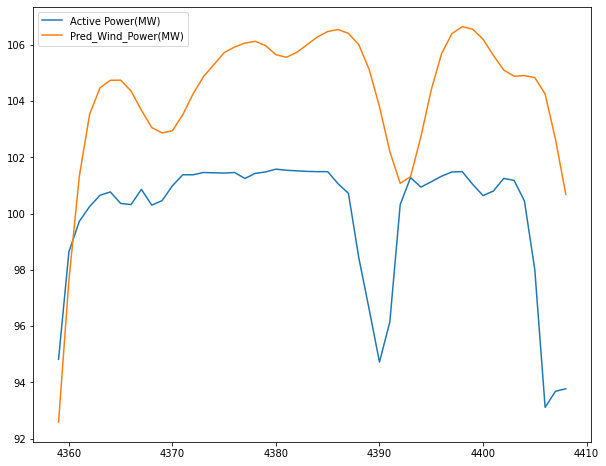

In [ ]:
df_final[['Active Power(MW)','Pred_Wind_Power(MW)']].tail(50).plot()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
MSE=mean_squared_error(df_final['Active Power(MW)'],df_final['Pred_Wind_Power(MW)'])
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100

actual = df_final['Active Power(MW)']
pred = df_final['Pred_Wind_Power(MW)']

MAPE=mape(actual, pred)

In [ ]:
print('MSE = '+ str(MSE))
print('MAPE = '+ str(MAPE))

MSE = 69.16789856998196
MAPE = 8.85331401467131
